In [12]:
import os

import numpy as np
import matplotlib.pyplot as plt

from mazemdp.maze import build_maze, create_random_maze
from random import seed
from mazemdp import create_random_maze
from replay_sim import Agent
from utils import evaluate, to_plot, Replay, SimuData

from arguments import get_args, get_args_string
import argparse
from IPython.display import display, clear_output

In [13]:
parser = argparse.ArgumentParser()
parser.add_argument("--pre_explore", type = bool, default = True)
parser.add_argument("--start_random", type = bool, default = False)
parser.add_argument("--transi_goal_to_start", type = bool, default = True)

parser.add_argument("--plan_policy", type = str, default = "softmax")
parser.add_argument("--plan_only_start_end", type = bool, default = True)
parser.add_argument("--planning_steps", type = int, default = 20)
parser.add_argument("--expand_further", type = bool, default = True)

parser.add_argument("--set_all_need_to_1", type = bool, default = False)
parser.add_argument("--set_all_gain_to_1", type = bool, default = False)
parser.add_argument("--baseline_gain", type = float, default = 1e-10)
parser.add_argument("--EVM_thresh", type = float, default = 0)

parser.add_argument("--allow_loops", type = bool, default = False)
parser.add_argument("--online_offline", type = str, default = "online")
parser.add_argument("--remove_samestate", type = bool, default = True)


parser.add_argument("--gamma", type = float, default = 0.9)
parser.add_argument("--alpha", type = float, default = 1)
parser.add_argument("--lambda_", type = float, default = 0)
parser.add_argument("--T_learning_rate", type = float, default = 0.9)

parser.add_argument("--action_policy", type = str, default = "softmax")
parser.add_argument("--epsilon", type = float, default = 0.05)
parser.add_argument("--tau", type = float, default = 0.2)

parser.add_argument("--simulations", type = int, default = 50)
parser.add_argument("--episodes", type = int, default = 50)
parser.add_argument("--max_episode_steps", type = int, default = 1e5)

parser.add_argument("--reward_change_proba", type = float, default = 0)
parser.add_argument("--reward_multiplicator", type = float, default = 1)

_StoreAction(option_strings=['--reward_multiplicator'], dest='reward_multiplicator', nargs=None, const=None, default=1, type=<class 'float'>, choices=None, help=None, metavar=None)

In [14]:
args = parser.parse_args("") # trick for argparse on note book
all_default = {}
for key in vars(args):
    all_default[key] = parser.get_default(key)
print(all_default)

{'pre_explore': True, 'start_random': False, 'transi_goal_to_start': True, 'plan_policy': 'softmax', 'plan_only_start_end': True, 'planning_steps': 20, 'expand_further': True, 'set_all_need_to_1': False, 'set_all_gain_to_1': False, 'baseline_gain': 1e-10, 'EVM_thresh': 0, 'allow_loops': False, 'online_offline': 'online', 'remove_samestate': True, 'gamma': 0.9, 'alpha': 1, 'lambda_': 0, 'T_learning_rate': 0.9, 'action_policy': 'softmax', 'epsilon': 0.05, 'tau': 0.2, 'simulations': 50, 'episodes': 50, 'max_episode_steps': 100000.0, 'reward_change_proba': 0, 'reward_multiplicator': 1}


In [26]:
mdp = create_random_maze(5, 5, 0.2) #linear
args.episodes = 50
args.simulations = 50
args.set_all_need_to_1 = True
args.start_random = True
print(get_args_string(args))
list_data = []
for i in range(args.simulations):
    replay = Replay()
    saver = SimuData(replay)
    rat = Agent(mdp, args, saver)
    rat.learn(args, seed = i)
    list_data.append(saver)

0_0.9_softmax_False_1_1e-10_50_0.05_True_0.9_0_100000.0_online_True_softmax_20_True_True_0_1_False_True_50_True_0.2_True_
#### EPISODE 1 ####
TRAIN: 10
#### EPISODE 2 ####
TRAIN: 2
#### EPISODE 3 ####
TRAIN: 4
#### EPISODE 4 ####
TRAIN: 5
#### EPISODE 5 ####
TRAIN: 5
#### EPISODE 6 ####
TRAIN: 2
#### EPISODE 7 ####
TRAIN: 12
#### EPISODE 8 ####
TRAIN: 7
#### EPISODE 9 ####
TRAIN: 1
#### EPISODE 10 ####
TRAIN: 49
#### EPISODE 11 ####
TRAIN: 17
#### EPISODE 12 ####
TRAIN: 9
#### EPISODE 13 ####
TRAIN: 13
#### EPISODE 14 ####
TRAIN: 6
#### EPISODE 15 ####
TRAIN: 25
#### EPISODE 16 ####
TRAIN: 12
#### EPISODE 17 ####
TRAIN: 9
#### EPISODE 18 ####
TRAIN: 3
#### EPISODE 19 ####
TRAIN: 30
#### EPISODE 20 ####
TRAIN: 25
#### EPISODE 21 ####
TRAIN: 21
#### EPISODE 22 ####
TRAIN: 4
#### EPISODE 23 ####
TRAIN: 26
#### EPISODE 24 ####
TRAIN: 49
#### EPISODE 25 ####
TRAIN: 32
#### EPISODE 26 ####
TRAIN: 22
#### EPISODE 27 ####
TRAIN: 2
#### EPISODE 28 ####
TRAIN: 6
#### EPISODE 29 ####
TRAIN: 32
##

#### EPISODE 16 ####
TRAIN: 12
#### EPISODE 17 ####
TRAIN: 14
#### EPISODE 18 ####
TRAIN: 24
#### EPISODE 19 ####
TRAIN: 18
#### EPISODE 20 ####
TRAIN: 23
#### EPISODE 21 ####
TRAIN: 11
#### EPISODE 22 ####
TRAIN: 7
#### EPISODE 23 ####
TRAIN: 51
#### EPISODE 24 ####
TRAIN: 37
#### EPISODE 25 ####
TRAIN: 22
#### EPISODE 26 ####
TRAIN: 16
#### EPISODE 27 ####
TRAIN: 5
#### EPISODE 28 ####
TRAIN: 17
#### EPISODE 29 ####
TRAIN: 1
#### EPISODE 30 ####
TRAIN: 17
#### EPISODE 31 ####
TRAIN: 19
#### EPISODE 32 ####
TRAIN: 15
#### EPISODE 33 ####
TRAIN: 36
#### EPISODE 34 ####
TRAIN: 102
#### EPISODE 35 ####
TRAIN: 56
#### EPISODE 36 ####
TRAIN: 38
#### EPISODE 37 ####
TRAIN: 19
#### EPISODE 38 ####
TRAIN: 3
#### EPISODE 39 ####
TRAIN: 1
#### EPISODE 40 ####
TRAIN: 99
#### EPISODE 41 ####
TRAIN: 2
#### EPISODE 42 ####
TRAIN: 30
#### EPISODE 43 ####
TRAIN: 11
#### EPISODE 44 ####
TRAIN: 26
#### EPISODE 45 ####
TRAIN: 3
#### EPISODE 46 ####
TRAIN: 7
#### EPISODE 47 ####
TRAIN: 19
#### EPISODE 48

#### EPISODE 35 ####
TRAIN: 4
#### EPISODE 36 ####
TRAIN: 26
#### EPISODE 37 ####
TRAIN: 17
#### EPISODE 38 ####
TRAIN: 63
#### EPISODE 39 ####
TRAIN: 14
#### EPISODE 40 ####
TRAIN: 38
#### EPISODE 41 ####
TRAIN: 33
#### EPISODE 42 ####
TRAIN: 17
#### EPISODE 43 ####
TRAIN: 6
#### EPISODE 44 ####
TRAIN: 31
#### EPISODE 45 ####
TRAIN: 5
#### EPISODE 46 ####
TRAIN: 28
#### EPISODE 47 ####
TRAIN: 9
#### EPISODE 48 ####
TRAIN: 4
#### EPISODE 49 ####
TRAIN: 29
#### EPISODE 50 ####
TRAIN: 1
#### EPISODE 1 ####
TRAIN: 226
#### EPISODE 2 ####
TRAIN: 7
#### EPISODE 3 ####
TRAIN: 7
#### EPISODE 4 ####
TRAIN: 6
#### EPISODE 5 ####
TRAIN: 9
#### EPISODE 6 ####
TRAIN: 6
#### EPISODE 7 ####
TRAIN: 36
#### EPISODE 8 ####
TRAIN: 2
#### EPISODE 9 ####
TRAIN: 26
#### EPISODE 10 ####
TRAIN: 48
#### EPISODE 11 ####
TRAIN: 52
#### EPISODE 12 ####
TRAIN: 16
#### EPISODE 13 ####
TRAIN: 22
#### EPISODE 14 ####
TRAIN: 10
#### EPISODE 15 ####
TRAIN: 19
#### EPISODE 16 ####
TRAIN: 71
#### EPISODE 17 ####
TRAIN: 

#### EPISODE 4 ####
TRAIN: 5
#### EPISODE 5 ####
TRAIN: 7
#### EPISODE 6 ####
TRAIN: 21
#### EPISODE 7 ####
TRAIN: 13
#### EPISODE 8 ####
TRAIN: 7
#### EPISODE 9 ####
TRAIN: 5
#### EPISODE 10 ####
TRAIN: 10
#### EPISODE 11 ####
TRAIN: 10
#### EPISODE 12 ####
TRAIN: 14
#### EPISODE 13 ####
TRAIN: 24
#### EPISODE 14 ####
TRAIN: 18
#### EPISODE 15 ####
TRAIN: 11
#### EPISODE 16 ####
TRAIN: 29
#### EPISODE 17 ####
TRAIN: 29
#### EPISODE 18 ####
TRAIN: 16
#### EPISODE 19 ####
TRAIN: 33
#### EPISODE 20 ####
TRAIN: 36
#### EPISODE 21 ####
TRAIN: 18
#### EPISODE 22 ####
TRAIN: 18
#### EPISODE 23 ####
TRAIN: 16
#### EPISODE 24 ####
TRAIN: 29
#### EPISODE 25 ####
TRAIN: 5
#### EPISODE 26 ####
TRAIN: 15
#### EPISODE 27 ####
TRAIN: 9
#### EPISODE 28 ####
TRAIN: 40
#### EPISODE 29 ####
TRAIN: 64
#### EPISODE 30 ####
TRAIN: 53
#### EPISODE 31 ####
TRAIN: 31
#### EPISODE 32 ####
TRAIN: 14
#### EPISODE 33 ####
TRAIN: 5
#### EPISODE 34 ####
TRAIN: 63
#### EPISODE 35 ####
TRAIN: 32
#### EPISODE 36 ####


#### EPISODE 24 ####
TRAIN: 42
#### EPISODE 25 ####
TRAIN: 68
#### EPISODE 26 ####
TRAIN: 44
#### EPISODE 27 ####
TRAIN: 19
#### EPISODE 28 ####
TRAIN: 4
#### EPISODE 29 ####
TRAIN: 1
#### EPISODE 30 ####
TRAIN: 19
#### EPISODE 31 ####
TRAIN: 25
#### EPISODE 32 ####
TRAIN: 24
#### EPISODE 33 ####
TRAIN: 5
#### EPISODE 34 ####
TRAIN: 4
#### EPISODE 35 ####
TRAIN: 18
#### EPISODE 36 ####
TRAIN: 3
#### EPISODE 37 ####
TRAIN: 49
#### EPISODE 38 ####
TRAIN: 9
#### EPISODE 39 ####
TRAIN: 9
#### EPISODE 40 ####
TRAIN: 1
#### EPISODE 41 ####
TRAIN: 20
#### EPISODE 42 ####
TRAIN: 31
#### EPISODE 43 ####
TRAIN: 36
#### EPISODE 44 ####
TRAIN: 24
#### EPISODE 45 ####
TRAIN: 10
#### EPISODE 46 ####
TRAIN: 5
#### EPISODE 47 ####
TRAIN: 3
#### EPISODE 48 ####
TRAIN: 40
#### EPISODE 49 ####
TRAIN: 10
#### EPISODE 50 ####
TRAIN: 7
#### EPISODE 1 ####
TRAIN: 89
#### EPISODE 2 ####
TRAIN: 3
#### EPISODE 3 ####
TRAIN: 2
#### EPISODE 4 ####
TRAIN: 9
#### EPISODE 5 ####
TRAIN: 11
#### EPISODE 6 ####
TRAIN: 

#### EPISODE 43 ####
TRAIN: 1
#### EPISODE 44 ####
TRAIN: 22
#### EPISODE 45 ####
TRAIN: 28
#### EPISODE 46 ####
TRAIN: 33
#### EPISODE 47 ####
TRAIN: 69
#### EPISODE 48 ####
TRAIN: 10
#### EPISODE 49 ####
TRAIN: 8
#### EPISODE 50 ####
TRAIN: 18
#### EPISODE 1 ####
TRAIN: 102
#### EPISODE 2 ####
TRAIN: 2
#### EPISODE 3 ####
TRAIN: 3
#### EPISODE 4 ####
TRAIN: 5
#### EPISODE 5 ####
TRAIN: 4
#### EPISODE 6 ####
TRAIN: 4
#### EPISODE 7 ####
TRAIN: 5
#### EPISODE 8 ####
TRAIN: 2
#### EPISODE 9 ####
TRAIN: 5
#### EPISODE 10 ####
TRAIN: 13
#### EPISODE 11 ####
TRAIN: 24
#### EPISODE 12 ####
TRAIN: 12
#### EPISODE 13 ####
TRAIN: 6
#### EPISODE 14 ####
TRAIN: 19
#### EPISODE 15 ####
TRAIN: 38
#### EPISODE 16 ####
TRAIN: 15
#### EPISODE 17 ####
TRAIN: 11
#### EPISODE 18 ####
TRAIN: 7
#### EPISODE 19 ####
TRAIN: 12
#### EPISODE 20 ####
TRAIN: 10
#### EPISODE 21 ####
TRAIN: 13
#### EPISODE 22 ####
TRAIN: 4
#### EPISODE 23 ####
TRAIN: 3
#### EPISODE 24 ####
TRAIN: 5
#### EPISODE 25 ####
TRAIN: 34


#### EPISODE 13 ####
TRAIN: 6
#### EPISODE 14 ####
TRAIN: 16
#### EPISODE 15 ####
TRAIN: 5
#### EPISODE 16 ####
TRAIN: 5
#### EPISODE 17 ####
TRAIN: 12
#### EPISODE 18 ####
TRAIN: 3
#### EPISODE 19 ####
TRAIN: 14
#### EPISODE 20 ####
TRAIN: 24
#### EPISODE 21 ####
TRAIN: 28
#### EPISODE 22 ####
TRAIN: 45
#### EPISODE 23 ####
TRAIN: 16
#### EPISODE 24 ####
TRAIN: 2
#### EPISODE 25 ####
TRAIN: 29
#### EPISODE 26 ####
TRAIN: 10
#### EPISODE 27 ####
TRAIN: 5
#### EPISODE 28 ####
TRAIN: 11
#### EPISODE 29 ####
TRAIN: 21
#### EPISODE 30 ####
TRAIN: 3
#### EPISODE 31 ####
TRAIN: 8
#### EPISODE 32 ####
TRAIN: 55
#### EPISODE 33 ####
TRAIN: 23
#### EPISODE 34 ####
TRAIN: 19
#### EPISODE 35 ####
TRAIN: 2
#### EPISODE 36 ####
TRAIN: 1
#### EPISODE 37 ####
TRAIN: 34
#### EPISODE 38 ####
TRAIN: 22
#### EPISODE 39 ####
TRAIN: 4
#### EPISODE 40 ####
TRAIN: 12
#### EPISODE 41 ####
TRAIN: 6
#### EPISODE 42 ####
TRAIN: 16
#### EPISODE 43 ####
TRAIN: 32
#### EPISODE 44 ####
TRAIN: 8
#### EPISODE 45 ####


#### EPISODE 33 ####
TRAIN: 19
#### EPISODE 34 ####
TRAIN: 8
#### EPISODE 35 ####
TRAIN: 5
#### EPISODE 36 ####
TRAIN: 12
#### EPISODE 37 ####
TRAIN: 2
#### EPISODE 38 ####
TRAIN: 13
#### EPISODE 39 ####
TRAIN: 13
#### EPISODE 40 ####
TRAIN: 2
#### EPISODE 41 ####
TRAIN: 43
#### EPISODE 42 ####
TRAIN: 8
#### EPISODE 43 ####
TRAIN: 9
#### EPISODE 44 ####
TRAIN: 27
#### EPISODE 45 ####
TRAIN: 18
#### EPISODE 46 ####
TRAIN: 21
#### EPISODE 47 ####
TRAIN: 5
#### EPISODE 48 ####
TRAIN: 40
#### EPISODE 49 ####
TRAIN: 16
#### EPISODE 50 ####
TRAIN: 38
#### EPISODE 1 ####
TRAIN: 27
#### EPISODE 2 ####
TRAIN: 8
#### EPISODE 3 ####
TRAIN: 8
#### EPISODE 4 ####
TRAIN: 8
#### EPISODE 5 ####
TRAIN: 12
#### EPISODE 6 ####
TRAIN: 23
#### EPISODE 7 ####
TRAIN: 3
#### EPISODE 8 ####
TRAIN: 43
#### EPISODE 9 ####
TRAIN: 15
#### EPISODE 10 ####
TRAIN: 26
#### EPISODE 11 ####
TRAIN: 34
#### EPISODE 12 ####
TRAIN: 41
#### EPISODE 13 ####
TRAIN: 3
#### EPISODE 14 ####
TRAIN: 29
#### EPISODE 15 ####
TRAIN: 6

#### EPISODE 3 ####
TRAIN: 2
#### EPISODE 4 ####
TRAIN: 6
#### EPISODE 5 ####
TRAIN: 3
#### EPISODE 6 ####
TRAIN: 3
#### EPISODE 7 ####
TRAIN: 19
#### EPISODE 8 ####
TRAIN: 8
#### EPISODE 9 ####
TRAIN: 18
#### EPISODE 10 ####
TRAIN: 6
#### EPISODE 11 ####
TRAIN: 5
#### EPISODE 12 ####
TRAIN: 23
#### EPISODE 13 ####
TRAIN: 29
#### EPISODE 14 ####
TRAIN: 10
#### EPISODE 15 ####
TRAIN: 18
#### EPISODE 16 ####
TRAIN: 5
#### EPISODE 17 ####
TRAIN: 6
#### EPISODE 18 ####
TRAIN: 14
#### EPISODE 19 ####
TRAIN: 26
#### EPISODE 20 ####
TRAIN: 3
#### EPISODE 21 ####
TRAIN: 18
#### EPISODE 22 ####
TRAIN: 6
#### EPISODE 23 ####
TRAIN: 15
#### EPISODE 24 ####
TRAIN: 2
#### EPISODE 25 ####
TRAIN: 9
#### EPISODE 26 ####
TRAIN: 2
#### EPISODE 27 ####
TRAIN: 38
#### EPISODE 28 ####
TRAIN: 7
#### EPISODE 29 ####
TRAIN: 3
#### EPISODE 30 ####
TRAIN: 68
#### EPISODE 31 ####
TRAIN: 2
#### EPISODE 32 ####
TRAIN: 1
#### EPISODE 33 ####
TRAIN: 6
#### EPISODE 34 ####
TRAIN: 14
#### EPISODE 35 ####
TRAIN: 14
###

#### EPISODE 23 ####
TRAIN: 18
#### EPISODE 24 ####
TRAIN: 32
#### EPISODE 25 ####
TRAIN: 12
#### EPISODE 26 ####
TRAIN: 14
#### EPISODE 27 ####
TRAIN: 14
#### EPISODE 28 ####
TRAIN: 13
#### EPISODE 29 ####
TRAIN: 52
#### EPISODE 30 ####
TRAIN: 5
#### EPISODE 31 ####
TRAIN: 14
#### EPISODE 32 ####
TRAIN: 18
#### EPISODE 33 ####
TRAIN: 13
#### EPISODE 34 ####
TRAIN: 17
#### EPISODE 35 ####
TRAIN: 42
#### EPISODE 36 ####
TRAIN: 8
#### EPISODE 37 ####
TRAIN: 2
#### EPISODE 38 ####
TRAIN: 31
#### EPISODE 39 ####
TRAIN: 19
#### EPISODE 40 ####
TRAIN: 30
#### EPISODE 41 ####
TRAIN: 30
#### EPISODE 42 ####
TRAIN: 23
#### EPISODE 43 ####
TRAIN: 6
#### EPISODE 44 ####
TRAIN: 27
#### EPISODE 45 ####
TRAIN: 22
#### EPISODE 46 ####
TRAIN: 94
#### EPISODE 47 ####
TRAIN: 22
#### EPISODE 48 ####
TRAIN: 15
#### EPISODE 49 ####
TRAIN: 16
#### EPISODE 50 ####
TRAIN: 35
#### EPISODE 1 ####
TRAIN: 31
#### EPISODE 2 ####
TRAIN: 5
#### EPISODE 3 ####
TRAIN: 11
#### EPISODE 4 ####
TRAIN: 14
#### EPISODE 5 ##

In [27]:
### ANALYSIS ###

min_num_cells = 5
min_frac_cells = 0
forward_count = np.zeros((len(list_data), mdp.nb_states))
reverse_count = np.zeros((len(list_data), mdp.nb_states))
next_state = np.full((mdp.nb_states, 4), np.NaN)

In [28]:
for s in range(mdp.nb_states):
    for a in range(mdp.action_space.size):
        mdp.reset()
        mdp.current_state = s
        s_next, _, _, _ = mdp.step(a)
        next_state[s, a] = s_next

In [29]:

def get_candidate_events(data, mdp, min_frac_cells, min_num_cells):
    #Identify candidate replay events: timepoints in which the number of replayed states is greater than minFracCells,minNumCells
    candidate_events = []
    for idx, r_s in enumerate(data.replay.state):
        if len(r_s) >= max(mdp.nb_states * min_frac_cells , min_num_cells):
            candidate_events.append(idx)

    return candidate_events

In [34]:
## FIG 3 A ##

for k, data in enumerate(list_data):
    print("ANALYSING SIMU NB: {}".format(k + 1))
    data.replay.state = np.array(data.replay.state).T
    data.replay.action = np.array(data.replay.action).T
    candidate_events = get_candidate_events(data, mdp, min_frac_cells, min_num_cells)
    agent_pos = np.array(data.list_exp)[candidate_events]# agent position during each candidate event
    agent_pos = agent_pos[:,0]
    for e, evt in enumerate(candidate_events):
        event_state = np.array(data.replay.state[evt]) # In a multi-step sequence, simData.replay.state has 1->2 in one row, 2->3 in another row, etc
        event_action = np.array(data.replay.action[evt]) # In a multi-step sequence, simData.replay.action has the action taken at each step of the trajectory
        # Identify break points in this event, separating event into sequences
        event_dir = np.full(len(event_state)- 1, "")
        break_points = [0] # Save breakpoints that divide contiguous replay events

        for i, evt_state in enumerate(event_state[:-1]):
            # If state(i) and action(i) leads to state(i+1): FORWARD
            if next_state[int(event_state[i]), int(event_action[i])] == event_state[i +1]:
                event_dir[i] = "F"

            # If state(i+1) and action(i+1) leads to state(i): REVERSE
            if next_state[int(event_state[i + 1]), int(event_action[i + 1])] == event_state[i]:
                event_dir[i] = "R"

            if event_dir[i] == "": # If this transition was neither forward nor backward
                break_points.append(i - 1) # Then, call this a breakpoint

            elif i > 0:
                if event_dir[i] != event_dir[i - 1]:
                    break_points.append(i - 1)

            if (i) == (len(event_state) - 1):
                break_points.append(i) # Add a breakpoint after the last transition

        # Break this event into segments of sequential activity
        for j, b_pt in enumerate(break_points[:-1]):
            this_chunk = list(range(break_points[j] + 1, break_points[j + 1] + 1))
            if (len(this_chunk) + 1) >= min_num_cells:
                # Extract information from this sequential event
                replay_dir = event_dir[this_chunk] # Direction of transition
                replay_state = event_state[this_chunk + [this_chunk[-1] + 1]] # start state
                replay_action = event_action[this_chunk + [this_chunk[-1] + 1]] # action

                if replay_dir[0] == "F":
                    forward_count[k, int(agent_pos[e])] += 1
                elif replay_dir[0] == "R":
                    reverse_count[k, int(agent_pos[e])] += 1

#
# Compute the number of significant events BEFORE (preplay) and AFTER (replay) an event (which could be larger than 1)
# PS: Notice that this is not a measure of the percent of episodes with a significant event (which would produce a smaller numbers)
print(forward_count.shape)
preplay_forward = np.nansum(forward_count[:,: -1], axis=0) / args.episodes # goal state is always last
replay_forward = np.nansum(forward_count[:, -1], axis=0) / args.episodes
preplay_reverse = np.nansum(reverse_count[:,: -1 ],axis=0) / args.episodes # goal state is always last
replay_reverse = np.nansum(reverse_count[:, -1], axis=0) / args.episodes
print([np.nanmean(preplay_forward), np.nanmean(replay_forward), np.nanmean(preplay_reverse), np.nanmean(replay_reverse)])


ANALYSING SIMU NB: 1
ANALYSING SIMU NB: 2
ANALYSING SIMU NB: 3
ANALYSING SIMU NB: 4
ANALYSING SIMU NB: 5
ANALYSING SIMU NB: 6
ANALYSING SIMU NB: 7
ANALYSING SIMU NB: 8
ANALYSING SIMU NB: 9
ANALYSING SIMU NB: 10
ANALYSING SIMU NB: 11
ANALYSING SIMU NB: 12
ANALYSING SIMU NB: 13
ANALYSING SIMU NB: 14
ANALYSING SIMU NB: 15
ANALYSING SIMU NB: 16
ANALYSING SIMU NB: 17
ANALYSING SIMU NB: 18
ANALYSING SIMU NB: 19
ANALYSING SIMU NB: 20
ANALYSING SIMU NB: 21
ANALYSING SIMU NB: 22
ANALYSING SIMU NB: 23
ANALYSING SIMU NB: 24
ANALYSING SIMU NB: 25
ANALYSING SIMU NB: 26
ANALYSING SIMU NB: 27
ANALYSING SIMU NB: 28
ANALYSING SIMU NB: 29
ANALYSING SIMU NB: 30
ANALYSING SIMU NB: 31
ANALYSING SIMU NB: 32
ANALYSING SIMU NB: 33
ANALYSING SIMU NB: 34
ANALYSING SIMU NB: 35
ANALYSING SIMU NB: 36
ANALYSING SIMU NB: 37
ANALYSING SIMU NB: 38
ANALYSING SIMU NB: 39
ANALYSING SIMU NB: 40
ANALYSING SIMU NB: 41
ANALYSING SIMU NB: 42
ANALYSING SIMU NB: 43
ANALYSING SIMU NB: 44
ANALYSING SIMU NB: 45
ANALYSING SIMU NB: 

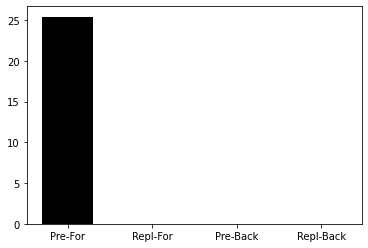

In [41]:
to_plot = [np.nanmean(preplay_forward), np.nanmean(replay_forward), np.nanmean(preplay_reverse), np.nanmean(replay_reverse)]
plt.bar(range(len(to_plot)), to_plot, width = 0.6, color = 'black')
plt.xticks(range(len(to_plot)), ["Pre-For", 'Repl-For', 'Pre-Back', 'Repl-Back'])
plt.savefig("results/Mattar/mattar_fig_3_a_open_maze.pdf")